# Decision Trees

Pip installed pandas library, and imported the library into my notebook.

In [27]:
import pandas

df = pandas.read_csv("data.csv") #dataframe

df #type df to get a better formatted table

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


In [28]:
df.Age #can just show a column

0     36
1     42
2     23
3     52
4     43
5     44
6     66
7     35
8     52
9     35
10    24
11    18
12    45
Name: Age, dtype: int64

In [29]:
df.Age.mean() #mean, lots of different functions available in pandas library

39.61538461538461

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Experience'}>],
       [<Axes: title={'center': 'Rank'}>, <Axes: >]], dtype=object)

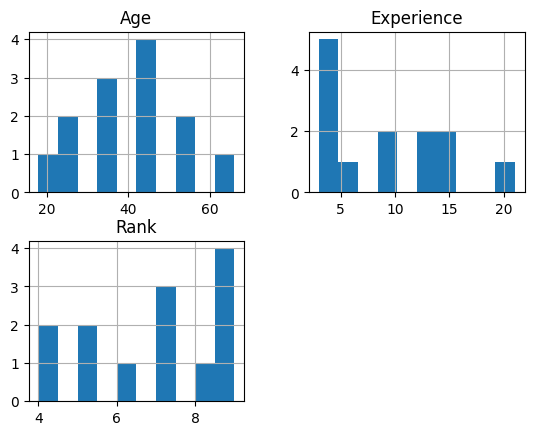

In [30]:
df.hist() #plotting the data on graphs

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

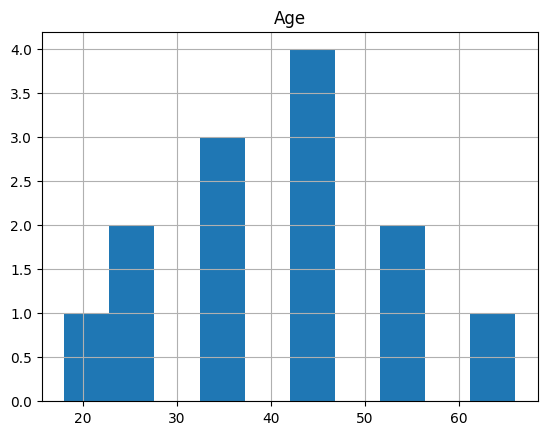

In [31]:
df.hist(column='Age') #choosing a specific column

## Data Engineering

In [32]:
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


Replaced non numerics with numerics using the mapping `map` operation in `pandas`

In [33]:
d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,0,0
1,42,12,4,1,0
2,23,4,6,2,0
3,52,4,4,1,0
4,43,21,8,1,1
5,44,14,5,0,0
6,66,3,7,2,1
7,35,14,9,0,1
8,52,13,7,2,1
9,35,5,9,2,1


Separating the x and y values, and calling the print function on both to check

In [35]:
features = ['Age', 'Experience', 'Rank', 'Nationality']

x = df[features]
y = df['Go']

print(x)
print(y)

    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0
0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64


In [42]:
print(x.values) #numpy, 2d array (x), 1d array (y)
x.values.shape


[[36 10  9  0]
 [42 12  4  1]
 [23  4  6  2]
 [52  4  4  1]
 [43 21  8  1]
 [44 14  5  0]
 [66  3  7  2]
 [35 14  9  0]
 [52 13  7  2]
 [35  5  9  2]
 [24  3  5  1]
 [18  3  7  0]
 [45  9  9  0]]


(13, 4)

Imported decision tree classifier from `sklearn` and defined an instance of it, then fitted it using x and y labels, and then plotted the tree

[Text(0.2857142857142857, 0.9, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.14285714285714285, 0.7, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.42857142857142855, 0.7, 'Rank <= 8.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5714285714285714, 0.5, 'Experience <= 9.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.42857142857142855, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7142857142857143, 0.3, 'Experience <= 12.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5714285714285714, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8571428571428571, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

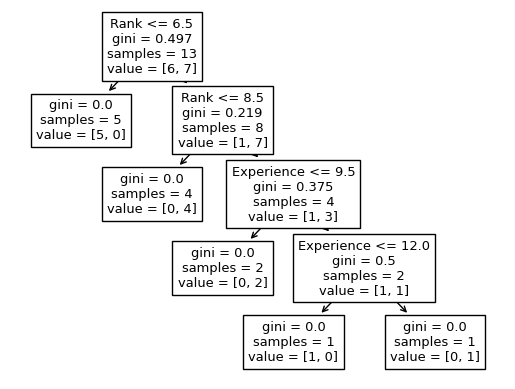

In [45]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import matplotlib.pyplot as plt

dtree = DecisionTreeClassifier()
dtree = dtree.fit(x, y)

tree.plot_tree(dtree, feature_names=features)

The term "Gini" in the context of decision trees usually refers to the Gini impurity, which is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the set.

In the context of decision trees, the Gini impurity is used as a criterion to evaluate the purity of a node. The Gini impurity for a node is calculated by summing the probabilities of each class being chosen squared. If a node has a low Gini impurity, it means that most of the elements belong to the same class, making it a "pure" node.

When constructing a decision tree, the algorithm aims to split nodes in a way that reduces the Gini impurity. This involves selecting features and thresholds that minimize the impurity of child nodes after the split. The process continues recursively until a stopping condition is met, such as reaching a maximum depth or having nodes with a minimum number of samples.

In summary, Gini impurity is a measure of how often a randomly chosen element would be incorrectly classified, and it is used as a criterion for splitting nodes in decision trees to create more homogeneous subsets of data.

In [56]:
p=dtree.predict(x) #used the model in inference mode to get the prediction labels
p
print(p,y.values)

[0 0 0 0 1 0 1 1 1 1 0 1 1] [0 0 0 0 1 0 1 1 1 1 0 1 1]


In [53]:
accuracy = (p==y).mean()
accuracy #checking accuracy of algorithm on the training data

1.0